In [1]:
pip install matplot;

Note: you may need to restart the kernel to use updated packages.


In [3]:
# reading all csv files

import pandas as pd

q1 = pd.read_csv("202005-divvy-tripdata.csv")
q2 = pd.read_csv("202006-divvy-tripdata.csv")
q3 = pd.read_csv("202007-divvy-tripdata.csv")
q4 = pd.read_csv("202008-divvy-tripdata.csv")
q5 = pd.read_csv("202009-divvy-tripdata.csv")
q6 = pd.read_csv("202010-divvy-tripdata.csv")
q7 = pd.read_csv("202011-divvy-tripdata.csv")
q8 = pd.read_csv("202012-divvy-tripdata.csv")
q9 = pd.read_csv("202101-divvy-tripdata.csv")
q10 = pd.read_csv("202102-divvy-tripdata.csv")
q11 = pd.read_csv("202103-divvy-tripdata.csv")
q12 = pd.read_csv("202104-divvy-tripdata.csv")

In [4]:
# combining all csv files together

join_data = [q1, q2, q3, q4, q5, q6, q7, q8, q9, q10, q11, q12]
q_nd = pd.concat(join_data)

In [5]:
q_nd.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,02668AD35674B983,docked_bike,27/05/2020 10:03,27/05/2020 10:16,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199,41.8777,-87.6353,41.8915,-87.6268,member
1,7A50CCAF1EDDB28F,docked_bike,25/05/2020 10:47,25/05/2020 11:05,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326,41.9295,-87.6431,41.9671,-87.6674,casual
2,2FFCDFDB91FE9A52,docked_bike,02/05/2020 14:11,02/05/2020 15:48,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260,41.9296,-87.7079,41.9296,-87.7079,casual
3,58991CF1DB75BA84,docked_bike,02/05/2020 16:25,02/05/2020 16:39,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157,41.9680,-87.6500,41.9367,-87.6368,casual
4,A79651EFECC268CD,docked_bike,29/05/2020 12:49,29/05/2020 13:27,Hermitage Ave & Polk St,261,Halsted St & Archer Ave,206,41.8715,-87.6699,41.8472,-87.6468,member


In [6]:
# here dayfirst is used to align the date column in second position without distubing the format.
# converting object type to datetime type

q_nd["start_date"] = pd.to_datetime(q_nd["started_at"], dayfirst = True)
q_nd["end_date"] = pd.to_datetime(q_nd["ended_at"], dayfirst = True)

In [7]:
# adding new column

q_nd['day_of_week'] = q_nd['start_date'].dt.day_name()

In [8]:
# adding new total_days, ride_length_min columns to the dataframe
# abs is used to avoid the negative numbers and timedelta is used to extract the only minutes from the diffrence
# here pd. timedelta will be implement to all datetime object.

q_nd['total_days'] = (q_nd['end_date'] - q_nd['start_date'])
q_nd['ride_length_min'] = abs((q_nd['end_date'] - q_nd['start_date'])/pd.Timedelta(minutes = 1))


In [9]:
# normalize view of dataset 

q_nd.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,day_of_week,total_days,ride_length_min
0,02668AD35674B983,docked_bike,27/05/2020 10:03,27/05/2020 10:16,Franklin St & Jackson Blvd,36,Wabash Ave & Grand Ave,199,41.8777,-87.6353,41.8915,-87.6268,member,2020-05-27 10:03:00,2020-05-27 10:16:00,Wednesday,0 days 00:13:00,13.0
1,7A50CCAF1EDDB28F,docked_bike,25/05/2020 10:47,25/05/2020 11:05,Clark St & Wrightwood Ave,340,Clark St & Leland Ave,326,41.9295,-87.6431,41.9671,-87.6674,casual,2020-05-25 10:47:00,2020-05-25 11:05:00,Monday,0 days 00:18:00,18.0
2,2FFCDFDB91FE9A52,docked_bike,02/05/2020 14:11,02/05/2020 15:48,Kedzie Ave & Milwaukee Ave,260,Kedzie Ave & Milwaukee Ave,260,41.9296,-87.7079,41.9296,-87.7079,casual,2020-05-02 14:11:00,2020-05-02 15:48:00,Saturday,0 days 01:37:00,97.0
3,58991CF1DB75BA84,docked_bike,02/05/2020 16:25,02/05/2020 16:39,Clarendon Ave & Leland Ave,251,Lake Shore Dr & Wellington Ave,157,41.9680,-87.6500,41.9367,-87.6368,casual,2020-05-02 16:25:00,2020-05-02 16:39:00,Saturday,0 days 00:14:00,14.0
4,A79651EFECC268CD,docked_bike,29/05/2020 12:49,29/05/2020 13:27,Hermitage Ave & Polk St,261,Halsted St & Archer Ave,206,41.8715,-87.6699,41.8472,-87.6468,member,2020-05-29 12:49:00,2020-05-29 13:27:00,Friday,0 days 00:38:00,38.0


In [10]:
q_nd.dtypes

ride_id                        object
rideable_type                  object
started_at                     object
ended_at                       object
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
start_date             datetime64[ns]
end_date               datetime64[ns]
day_of_week                    object
total_days            timedelta64[ns]
ride_length_min               float64
dtype: object

In [11]:
q_nd.drop_duplicates(subset = 'ride_id', keep = 'first', inplace = True)

In [12]:
q = q_nd.loc[q_nd['ride_id'] == "7C754A74F043C1C3"]
print(q)

                 ride_id rideable_type        started_at          ended_at  \
134795  7C754A74F043C1C3   docked_bike  01/05/2020 00:02  01/05/2020 00:20   

                  start_station_name start_station_id  \
134795  Michigan Ave & Washington St               43   

                      end_station_name end_station_id  start_lat  start_lng  \
134795  Wentworth Ave & 24th St (Temp)            132     41.884   -87.6247   

        end_lat  end_lng member_casual          start_date  \
134795  41.8501 -87.6321        member 2020-05-01 00:02:00   

                  end_date day_of_week      total_days  ride_length_min  
134795 2020-05-01 00:20:00      Friday 0 days 00:18:00             18.0  


In [13]:
# sorting the values

n_q = q_nd.sort_values(by = "start_date")

In [14]:
n_q.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_date,end_date,day_of_week,total_days,ride_length_min
134795,7C754A74F043C1C3,docked_bike,01/05/2020 00:02,01/05/2020 00:20,Michigan Ave & Washington St,43,Wentworth Ave & 24th St (Temp),132,41.8840,-87.6247,41.8501,-87.6321,member,2020-05-01 00:02:00,2020-05-01 00:20:00,Friday,0 days 00:18:00,18.0
39823,9BD98D6E5FBC7058,docked_bike,01/05/2020 00:04,01/05/2020 00:15,Wilton Ave & Belmont Ave,117,Broadway & Barry Ave,300,41.9402,-87.6530,41.9377,-87.6441,casual,2020-05-01 00:04:00,2020-05-01 00:15:00,Friday,0 days 00:11:00,11.0
156801,11190B9379C30638,docked_bike,01/05/2020 00:05,01/05/2020 00:21,Damen Ave & Wellington Ave,162,Dayton St & North Ave,60,41.9359,-87.6784,41.9106,-87.6494,casual,2020-05-01 00:05:00,2020-05-01 00:21:00,Friday,0 days 00:16:00,16.0
85978,28295BFE35AAA207,docked_bike,01/05/2020 00:07,01/05/2020 00:15,State St & 33rd St,148,MLK Jr Dr & 29th St,237,41.8347,-87.6258,41.8421,-87.6170,member,2020-05-01 00:07:00,2020-05-01 00:15:00,Friday,0 days 00:08:00,8.0
44075,E76405FC49708E37,docked_bike,01/05/2020 00:07,01/05/2020 00:13,Damen Ave & Sunnyside Ave,316,Western Ave & Leland Ave,239,41.9633,-87.6793,41.9665,-87.6884,casual,2020-05-01 00:07:00,2020-05-01 00:13:00,Friday,0 days 00:06:00,6.0


In [15]:
p = n_q.loc[n_q['ride_length_min'] < 0]
print(p)

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, start_date, end_date, day_of_week, total_days, ride_length_min]
Index: []


In [16]:
# mean value of ride_length_min column

d_mean = n_q[["ride_length_min"]].mean()

In [17]:
print(d_mean)

ride_length_min    28.015235
dtype: float64


In [18]:
# max value of ride_length_min column

d_max = n_q[["ride_length_min"]].max()

print (d_max)

ride_length_min    54283.0
dtype: float64


In [19]:
# min value of ride_length_min column

d_min = n_q[["ride_length_min"]].min()

print (d_min)

ride_length_min    0.0
dtype: float64


In [20]:
# median of ride_length_min column

d_median = n_q[["ride_length_min"]].median()

print (d_median)

ride_length_min    14.0
dtype: float64


In [21]:
#checking for an negative days or values

k = n_q.loc[n_q['ride_length_min'] > 500]

print(k)

                 ride_id rideable_type        started_at          ended_at  \
79914   E43B3F2211F7D8ED   docked_bike  01/05/2020 05:18  01/05/2020 18:40   
76187   0C666D8148BD3A6F   docked_bike  01/05/2020 07:48  12/05/2020 07:49   
168725  8B6973EF3DFBA78D   docked_bike  01/05/2020 12:43  02/05/2020 15:41   
46098   A91FEB8C3D1BFB08   docked_bike  01/05/2020 13:32  02/05/2020 13:51   
44335   A32200D58E2D0BC6   docked_bike  01/05/2020 13:54  02/05/2020 12:51   
...                  ...           ...               ...               ...   
145093  84FEFE16730A38DF  classic_bike  30/04/2021 20:03  01/05/2021 12:05   
66085   F1D0D74416C3FADE  classic_bike  30/04/2021 20:37  01/05/2021 12:43   
288402  915E41BBAA8E1D04  classic_bike  30/04/2021 21:10  01/05/2021 13:41   
254691  7E889B6001E57F34  classic_bike  30/04/2021 21:38  01/05/2021 07:39   
282569  05ECB90414BD78E2   docked_bike  30/04/2021 22:38  01/05/2021 10:23   

                  start_station_name start_station_id  \
79914 

In [22]:
n1 = n_q.loc[n_q['ride_length_min'] == 15841.0]
print(n1)

                ride_id rideable_type        started_at          ended_at  \
76187  0C666D8148BD3A6F   docked_bike  01/05/2020 07:48  12/05/2020 07:49   

      start_station_name start_station_id          end_station_name  \
76187     DuSable Museum              422  Commercial Ave & 83rd St   

      end_station_id  start_lat  start_lng  end_lat  end_lng member_casual  \
76187            581    41.7916   -87.6079  41.7446 -87.5512        casual   

               start_date            end_date day_of_week       total_days  \
76187 2020-05-01 07:48:00 2020-05-12 07:49:00      Friday 11 days 00:01:00   

       ride_length_min  
76187          15841.0  


In [25]:
n2 = n_q.loc[n_q['ride_length_min'] == 54283.0]
print(n2)

                 ride_id rideable_type        started_at          ended_at  \
236102  F6A59D72627F2711   docked_bike  02/09/2020 18:34  10/10/2020 11:17   

           start_station_name start_station_id          end_station_name  \
236102  Rush St & Superior St              161  Kingsbury St & Kinzie St   

       end_station_id  start_lat  start_lng    end_lat    end_lng  \
236102            133  41.895765 -87.625908  41.889177 -87.638506   

       member_casual          start_date            end_date day_of_week  \
236102        casual 2020-09-02 18:34:00 2020-10-10 11:17:00   Wednesday   

             total_days  ride_length_min  
236102 37 days 16:43:00          54283.0  


In [26]:
# mode of day_of_week column

d_mode = n_q[["day_of_week"]].mode()

print(d_mode)

  day_of_week
0    Saturday


In [27]:
# total dataframe statisitcs

n_q.describe()

,start_lat,start_lng,end_lat,end_lng,total_days,ride_length_min
count,3.741887e+06,3.741887e+06,3.736982e+06,3.736982e+06,3741887,3.741887e+06
mean,4.190384e+01,-8.764483e+01,4.190412e+01,-8.764511e+01,0 days 00:28:00.548599944,2.801523e+01
std,4.385947e-02,2.585841e-02,4.395757e-02,2.598614e-02,0 days 04:16:23.744594005,2.563951e+02
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,-3 days +07:10:00,0.000000e+00
25%,4.188224e+01,-8.765887e+01,4.188224e+01,-8.765914e+01,0 days 00:08:00,8.000000e+00
50%,4.190000e+01,-8.764142e+01,4.190036e+01,-8.764182e+01,0 days 00:14:00,1.400000e+01
75%,4.192962e+01,-8.762773e+01,4.193000e+01,-8.762773e+01,0 days 00:26:00,2.600000e+01
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,37 days 16:43:00,5.428300e+04


In [28]:
# ride_length_min Summary Statistic

n_q['ride_length_min'].describe()

count    3.741887e+06
mean     2.801523e+01
std      2.563951e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.400000e+01
75%      2.600000e+01
max      5.428300e+04
Name: ride_length_min, dtype: float64

In [29]:
# groupby using member_casual by considering ride_length_min reference

n_q.groupby('member_casual').ride_length_min.agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
member_casual,,,,
casual,44.344875,0.0,54283.0,21.0
member,16.552768,0.0,41271.0,11.0


In [30]:
# creating a pivot table from the dataframe

# here where indexes are rows and values are columns

# also importing the numpy function

import numpy as np


Pi_ds=pd.pivot_table(n_q, index=['member_casual', 'rideable_type', 'day_of_week'],values=['ride_length_min'],aggfunc=[np.mean, np.min, np.max, np.median])

In [31]:
Pi_ds

mean            amin  \
                                        ride_length_min ride_length_min   
member_casual rideable_type day_of_week                                   
casual        classic_bike  Friday            29.038757             0.0   
                            Monday            31.777720             0.0   
                            Saturday          32.776626             0.0   
                            Sunday            35.095491             0.0   
                            Thursday          25.672621             0.0   
                            Tuesday           30.728144             0.0   
                            Wednesday         27.781804             0.0   
              docked_bike   Friday            49.154661             0.0   
                            Monday            52.121838             0.0   
                            Saturday          51.898444             0.0   
                            Sunday            56.884595             0.0   
                            Thursday          49.160625             0.0   
                            Tuesday           46.732756             0.0   
                            Wednesday         47.241508             0.0   
              electric_bike Friday            20.002272             0.0   
                            Monday            21.003542             0.0   
                            Saturday          24.074090             0.0   
                            Sunday            24.743697             0.0   
                            Thursday          18.801963             0.0   
                            Tuesday           43.360159             0.0   
                            Wednesday         19.098744             0.0   
member        classic_bike  Friday            14.035389             0.0   
                            Monday            14.483842             0.0   
                            Saturday          16.076372             0.0   
                            Sunday            16.501324             0.0   
                            Thursday          13.301093             0.0   
                            Tuesday           14.074885             0.0   
                            Wednesday         13.852418             0.0   
              docked_bike   Friday            16.655472             0.0   
                            Monday            16.114867             0.0   
                            Saturday          18.504859             0.0   
                            Sunday            18.797045             0.0   
                            Thursday          15.961793             0.0   
                            Tuesday           15.760621             0.0   
                            Wednesday         16.097423             0.0   
              electric_bike Friday            13.330163             0.0   
                            Monday            12.855676             0.0   
                            Saturday          14.845654             0.0   
                            Sunday            14.875209             0.0   
                            Thursday          12.663106             0.0   
                            Tuesday           40.662197             0.0   
                            Wednesday         12.955747             0.0   

                                                   amax          median  
                                        ride_length_min ride_length_min  
member_casual rideable_type day_of_week                                  
casual        classic_bike  Friday          1500.000000       15.000000  
                            Monday          1500.000000       17.000000  
                            Saturday        1560.000000       19.000000  
                            Sunday          1500.000000       20.000000  
                            Thursday        1500.000000       13.000000  
                            Tuesday         1500.000000       17.000000  
         

In [32]:
# creating a new pivot table with count

Pi_ds2 = pd.pivot_table(n_q, index=['member_casual', 'rideable_type', 'day_of_week'],values=['ride_id'],aggfunc=[np.count_nonzero])

In [33]:
Pi_ds2

count_nonzero
                                              ride_id
member_casual rideable_type day_of_week              
casual        classic_bike  Friday              19016
                            Monday              17316
                            Saturday            32994
                            Sunday              27437
                            Thursday            12148
                            Tuesday             18999
                            Wednesday           13662
              docked_bike   Friday             165434
                            Monday             115058
                            Saturday           269960
                            Sunday             209760
                            Thursday           127569
                            Tuesday            109550
                            Wednesday          120297
              electric_bike Friday              45095
                            Monday              32435
                            Saturday            56600
                            Sunday              44378
                            Thursday            36864
                            Tuesday             33799
                            Wednesday           34918
member        classic_bike  Friday              59058
                            Monday              57434
                            Saturday            57102
                            Sunday              49461
                            Thursday            52346
                            Tuesday             61254
                            Wednesday           56240
              docked_bike   Friday             209327
                            Monday             174274
                            Saturday           221987
                            Sunday             179610
                            Thursday           203033
                            Tuesday            186853
                            Wednesday          205444
              electric_bike Friday              67610
                            Monday              56049
                            Saturday            63000
                            Sunday              50898
                            Thursday            64752
                            Tuesday             60018
                            Wednesday           62848

In [34]:
# merging two pivot tables using "left join" method

Pi_dt = Pi_ds.merge(Pi_ds2, on= ['member_casual', 'rideable_type', 'day_of_week'], how='left')

In [35]:
Pi_dt

mean            amin  \
                                        ride_length_min ride_length_min   
member_casual rideable_type day_of_week                                   
casual        classic_bike  Friday            29.038757             0.0   
                            Monday            31.777720             0.0   
                            Saturday          32.776626             0.0   
                            Sunday            35.095491             0.0   
                            Thursday          25.672621             0.0   
                            Tuesday           30.728144             0.0   
                            Wednesday         27.781804             0.0   
              docked_bike   Friday            49.154661             0.0   
                            Monday            52.121838             0.0   
                            Saturday          51.898444             0.0   
                            Sunday            56.884595             0.0   
                            Thursday          49.160625             0.0   
                            Tuesday           46.732756             0.0   
                            Wednesday         47.241508             0.0   
              electric_bike Friday            20.002272             0.0   
                            Monday            21.003542             0.0   
                            Saturday          24.074090             0.0   
                            Sunday            24.743697             0.0   
                            Thursday          18.801963             0.0   
                            Tuesday           43.360159             0.0   
                            Wednesday         19.098744             0.0   
member        classic_bike  Friday            14.035389             0.0   
                            Monday            14.483842             0.0   
                            Saturday          16.076372             0.0   
                            Sunday            16.501324             0.0   
                            Thursday          13.301093             0.0   
                            Tuesday           14.074885             0.0   
                            Wednesday         13.852418             0.0   
              docked_bike   Friday            16.655472             0.0   
                            Monday            16.114867             0.0   
                            Saturday          18.504859             0.0   
                            Sunday            18.797045             0.0   
                            Thursday          15.961793             0.0   
                            Tuesday           15.760621             0.0   
                            Wednesday         16.097423             0.0   
              electric_bike Friday            13.330163             0.0   
                            Monday            12.855676             0.0   
                            Saturday          14.845654             0.0   
                            Sunday            14.875209             0.0   
                            Thursday          12.663106             0.0   
                            Tuesday           40.662197             0.0   
                            Wednesday         12.955747             0.0   

                                                   amax          median  \
                                        ride_length_min ride_length_min   
member_casual rideable_type day_of_week                                   
casual        classic_bike  Friday          1500.000000       15.000000   
                            Monday          1500.000000       17.000000   
                            Saturday        1560.000000       19.000000   
                            Sunday          1500.000000       20.000000   
                            Thursday        1500.000000       13.000000   
                            Tuesday         1500.000000       17.000000   


In [36]:
c_s = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday']
cat_dtype = pd.CategoricalDtype(categories=c_s, ordered=True)

# Update Index Level Type
Pi_dt.index = Pi_dt.index.set_levels(
    Pi_dt.index.levels[-1].astype(cat_dtype), level=-1
)
# Sort values
Pi_t = Pi_dt.sort_values('day_of_week')

In [37]:
Pi_t

mean            amin  \
                                        ride_length_min ride_length_min   
member_casual rideable_type day_of_week                                   
casual        classic_bike  Monday            31.777720             0.0   
member        electric_bike Monday            12.855676             0.0   
              docked_bike   Monday            16.114867             0.0   
casual        docked_bike   Monday            52.121838             0.0   
member        classic_bike  Monday            14.483842             0.0   
casual        electric_bike Monday            21.003542             0.0   
member        docked_bike   Tuesday           15.760621             0.0   
casual        classic_bike  Tuesday           30.728144             0.0   
member        classic_bike  Tuesday           14.074885             0.0   
              electric_bike Tuesday           40.662197             0.0   
casual        docked_bike   Tuesday           46.732756             0.0   
              electric_bike Tuesday           43.360159             0.0   
                            Wednesday         19.098744             0.0   
member        docked_bike   Wednesday         16.097423             0.0   
              classic_bike  Wednesday         13.852418             0.0   
              electric_bike Wednesday         12.955747             0.0   
casual        docked_bike   Wednesday         47.241508             0.0   
              classic_bike  Wednesday         27.781804             0.0   
member        electric_bike Thursday          12.663106             0.0   
casual        electric_bike Thursday          18.801963             0.0   
              docked_bike   Thursday          49.160625             0.0   
              classic_bike  Thursday          25.672621             0.0   
member        docked_bike   Thursday          15.961793             0.0   
              classic_bike  Thursday          13.301093             0.0   
              docked_bike   Friday            16.655472             0.0   
              electric_bike Friday            13.330163             0.0   
casual        electric_bike Friday            20.002272             0.0   
              classic_bike  Friday            29.038757             0.0   
member        classic_bike  Friday            14.035389             0.0   
casual        docked_bike   Friday            49.154661             0.0   
                            Saturday          51.898444             0.0   
member        docked_bike   Saturday          18.504859             0.0   
              classic_bike  Saturday          16.076372             0.0   
casual        classic_bike  Saturday          32.776626             0.0   
member        electric_bike Saturday          14.845654             0.0   
casual        electric_bike Saturday          24.074090             0.0   
member        classic_bike  Sunday            16.501324             0.0   
              docked_bike   Sunday            18.797045             0.0   
casual        docked_bike   Sunday            56.884595             0.0   
              classic_bike  Sunday            35.095491             0.0   
member        electric_bike Sunday            14.875209             0.0   
casual        electric_bike Sunday            24.743697             0.0   

                                                   amax          median  \
                                        ride_length_min ride_length_min   
member_casual rideable_type day_of_week                                   
casual        classic_bike  Monday          1500.000000       17.000000   
member        electric_bike Monday           480.000000        9.000000   
              docked_bike   Monday         33421.366667       11.916667   
casual        docked_bike   Monday         37127.000000       23.516667   
member        classic_bike  Monday          1500.000000       10.000000   
casual        electric_bike Monday           480.000000       13.000000   


<AxesSubplot:xlabel='rideable_type,day_of_week'>

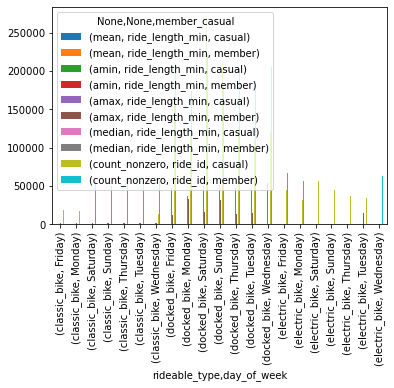

In [38]:
Pi_t.unstack(level=0).plot(kind='bar')

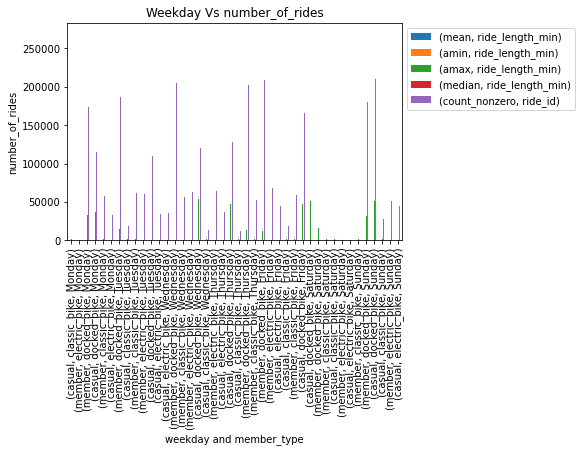

In [39]:
# legend setting plotting graph and here 'kind' is type of chart

import matplotlib.pyplot as plt
Pi_t.plot(kind = 'bar', title = 'Weekday Vs number_of_rides', xlabel = 'weekday and member_type', ylabel = 'number_of_rides', legend = 'True')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [40]:
n_q.to_csv('complete_file.csv')

In [41]:
Pi_t.to_csv('pivot_version.csv')